In [1]:
import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import interacting_blast_wave_1d

In [2]:
N = 60
T = 0.038

configs = {
    "MUSCL-Hancock": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        SED=True,
    ),
    "ZS2": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=2,
        ZS=True,
        adaptive_dt=True,
        PAD={"rho": (0, None)},
        SED=True,
    ),
    "ZS4": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=4,
        ZS=True,
        adaptive_dt=True,
        PAD={"rho": (0, None)},
        SED=True,
    ),
    "ZS8": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=8,
        ZS=True,
        adaptive_dt=True,
        PAD={"rho": (0, None)},
        SED=True,
    ),
    "MM2": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=2,
        MOOD=True,
        cascade="muscl",
        max_MOOD_iters=1,
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-7,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "MM4": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=4,
        MOOD=True,
        cascade="muscl",
        max_MOOD_iters=1,
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-7,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "MM8": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=8,
        MOOD=True,
        cascade="muscl",
        max_MOOD_iters=1,
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-7,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

sims = {}
for name, config in configs.items():
    print(f"Running {name}...")
    sim = EulerSolver(
        ic=interacting_blast_wave_1d,
        bcx="reflective",
        nx=1000 if config.get("MUSCL", False) else N * (config["p"] + 1),
        **config,
    )

    try:
        if config.get("MUSCL", False):
            sim.musclhancock(T)
        else:
            sim.run(T)
    except Exception as e:
        print(f"Failed: {e}")
        continue

    sims[name] = sim

Running MUSCL-Hancock...
Step #1997 @ t=3.80e-02 | dt=1.78e-05 | min(rho)=1.46e-01, min(P)=1.92e+01 | (done)                 
Running ZS2...
Step #354 @ t=3.80e-02 | dt=7.85e-05 | min(rho)=1.51e-01, min(P)=1.85e+01 | (done)                  
Running ZS4...
Step #586 @ t=3.80e-02 | dt=5.28e-05 | min(rho)=1.48e-01, min(P)=1.90e+01 | (done)                  
Running ZS8...
Step #1065 @ t=3.80e-02 | dt=9.93e-06 | min(rho)=1.47e-01, min(P)=1.91e+01 | (done)                 
Running MM2...
Step #342 @ t=3.80e-02 | dt=8.52e-05 | min(rho)=1.54e-01, min(P)=1.86e+01 | (done)                  
Running MM4...
Step #579 @ t=3.80e-02 | dt=4.05e-05 | min(rho)=1.51e-01, min(P)=1.89e+01 | (done)                  
Running MM8...
Step #1055 @ t=3.80e-02 | dt=1.40e-05 | min(rho)=1.49e-01, min(P)=1.91e+01 | (done)                 


(0.0, 1.0)

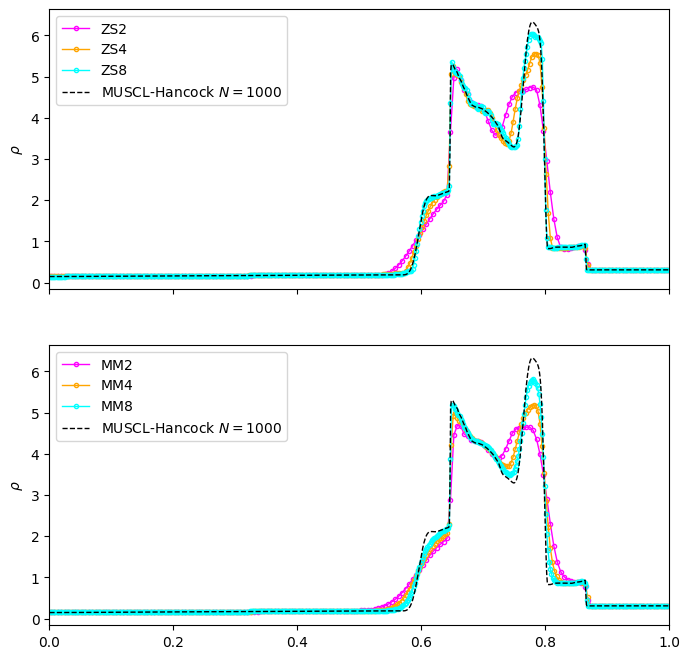

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey="row", figsize=(8, 8))

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$\rho$")


style = dict(linewidth=1, markersize=3)

for name, sim in sims.items():
    if name == "MUSCL-Hancock":
        continue
    j = 1 if sim.MOOD else 0
    plot_1d_slice(
        sim,
        axs[j],
        "rho",
        label=name,
        marker="o",
        mfc="none",
        color={2: "magenta", 4: "orange", 8: "cyan"}[sim.p],
        **style,
    )

simMH = sims["MUSCL-Hancock"]
plot_1d_slice(
    simMH,
    axs[0],
    "rho",
    label=r"MUSCL-Hancock $N=1000$",
    color="k",
    linestyle="--",
    **style,
)
plot_1d_slice(
    simMH,
    axs[1],
    "rho",
    label=r"MUSCL-Hancock $N=1000$",
    color="k",
    linestyle="--",
    **style,
)

axs[0].legend()
axs[1].legend()

axs[0].set_xlim(0, 1)